### Simple Linear Regression
1. Read the dataset
2. EDA, FE
3. Divide dataset into independent and dependent features
4. Further divide the dataset into train and test
5. Standard scaling on the test and train data
6. Train Model


In [1]:
# import dataset
# !kaggle datasets download -d burnoutminer/heights-and-weights-dataset

In [2]:
# unzip file
# !unzip 'heights-and-weights-dataset.zip'

In [3]:
# lets make pd dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('SOCR-HeightWeight.csv') 

In [4]:
# Do EDA
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
df = df.rename(columns={'Height(Inches)':'Height',
                        'Weight(Pounds)':'Weight'}) 

In [6]:
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Index     0
Height    0
Weight    0
dtype: int64

In [9]:
df.dtypes

Index       int64
Height    float64
Weight    float64
dtype: object

Text(0.5, 1.0, 'Weight Distribution')

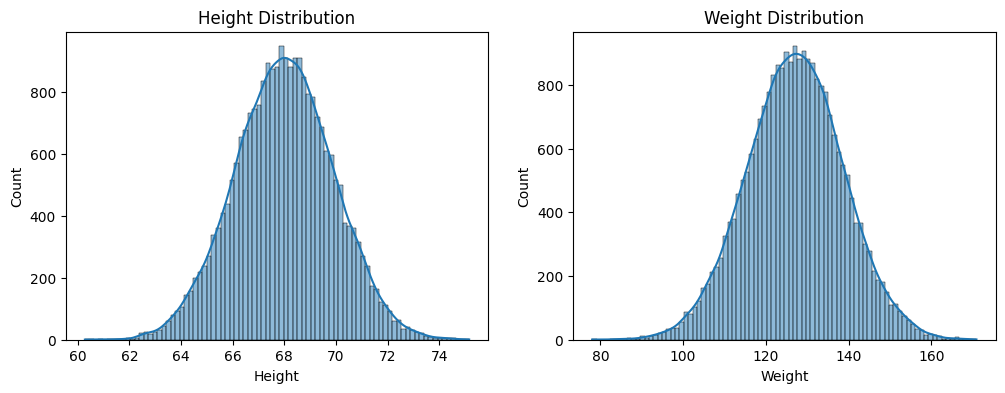

In [10]:
import seaborn as sbn

fig, axes = plt.subplots(1,2,figsize =(12,4))

sbn.histplot(df['Height'],kde = True,ax=axes[0])
axes[0].set_title("Height Distribution")

sbn.histplot(df['Weight'],kde = True,ax=axes[1])
axes[1].set_title("Weight Distribution")

<Axes: xlabel='Height', ylabel='Weight'>

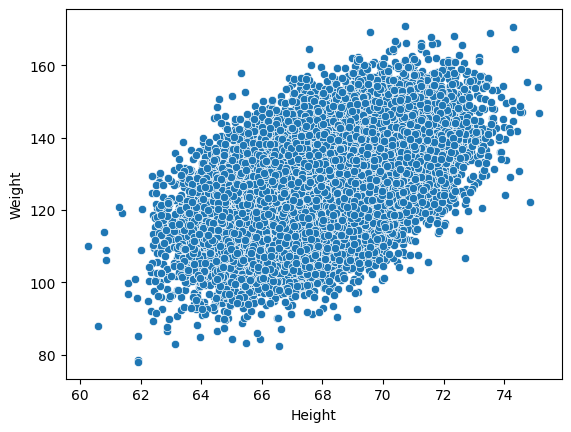

In [11]:
sbn.scatterplot(x= df['Height'],y = df['Weight'],data= df)

In [12]:
df.describe()

,Index,Height,Weight
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


<Axes: >

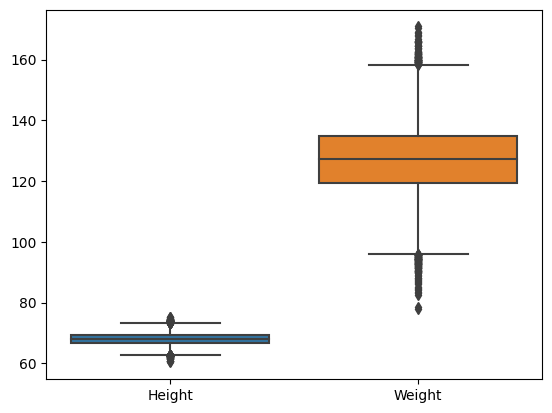

In [13]:
# treating outliers

sbn.boxplot(df[['Height','Weight']])

<Axes: >

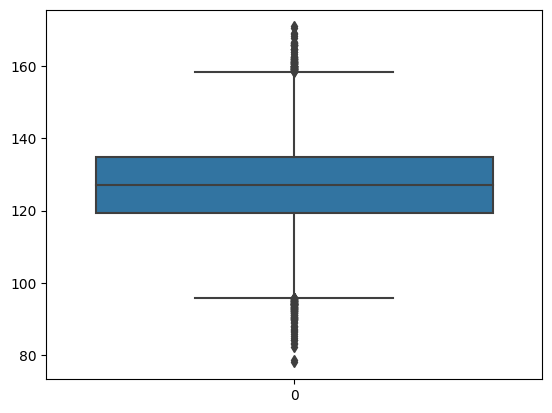

In [14]:
sbn.boxplot(df['Weight'])

In [15]:
# remove outliers

# for height
q1,q2,q3 = np.quantile(df['Height'],[0.25,0.50,0.75])

In [16]:
iqr = q3-q1
low_fence = q1-1.5*(iqr)
high_fence = q3+1.5*(iqr)

In [17]:
low_fence,high_fence

(62.85155749999999, 73.1257975)

In [18]:
# outliers in height
outlier_l_h = df[df['Height']<= low_fence]
outlier_h_h = df[df['Height']>= high_fence]


In [19]:
outlier_l_h

,Index,Height,Weight
412,413,62.01666,109.08480
1133,1134,62.75039,114.49000
1244,1245,62.64242,100.19820
2186,2187,62.60611,129.76000
2237,2238,62.78196,119.84700
...,...,...,...
22778,22779,62.48689,111.81650
22945,22946,61.92639,78.01476
23041,23042,62.37478,129.29000
24244,24245,62.26498,104.13480


In [20]:
# for height
q1,q2,q3 = np.quantile(df['Weight'],[0.25,0.50,0.75])
iqr = q3-q1
low_fence = q1-1.5*(iqr)
high_fence = q3+1.5*(iqr)
low_fence,high_fence

# outliers in weight
outlier_l_w = df[df['Weight']<= low_fence]
outlier_h_w = df[df['Weight']>= high_fence]

In [21]:
outlier_l_w

,Index,Height,Weight
249,250,65.93895,84.35980
293,294,69.13438,92.74955
472,473,65.69989,93.99438
698,699,65.75638,95.20216
727,728,63.12550,83.08527
...,...,...,...
23544,23545,65.96306,94.72570
23734,23735,65.25826,95.63814
23759,23760,66.78251,94.51209
24610,24611,66.56804,82.38298


In [22]:
# lets see number of outliers
len(outlier_l_w),len(outlier_h_w),len(outlier_h_h),len(outlier_h_h)

(106, 85, 88, 88)

In [23]:
unique_index = set(outlier_l_w.index.to_list()+ outlier_h_w.index.to_list()+
                   outlier_h_h.index.to_list()+outlier_l_h.index.to_list())

In [24]:
df = df[~df.index.isin(unique_index)]

<Axes: >

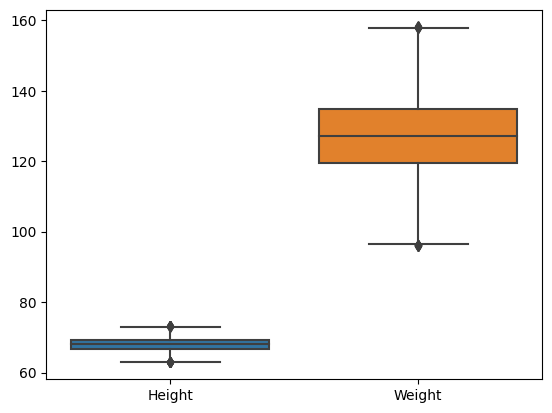

In [25]:
# lets see the outliers now

sbn.boxplot(df[['Height','Weight']])

# we have successfully removed the outliers

<Axes: >

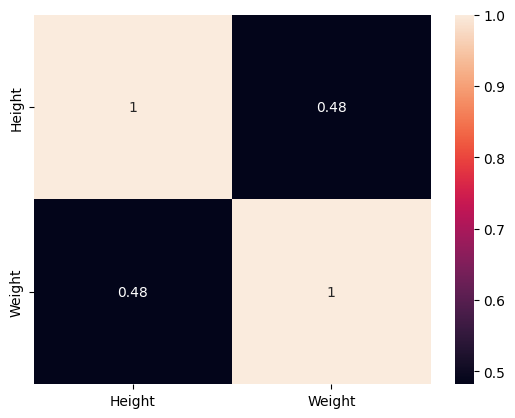

In [26]:
# lets see correlation between height and weight

sbn.heatmap(df[['Height','Weight']].corr(),annot= True)

# we can see there is a possitive correlation between weight and height

In [62]:
# Divide Dataset into independent and dependent feautures
X = df[['Weight']] ## independent feature
y= df[['Height']] ## dependent features

In [63]:
X.shape

(24657, 1)

In [64]:
X

,Weight
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971
...,...
24995,118.0312
24996,120.1932
24997,118.2655
24998,132.2682


In [65]:
y.shape

(24657, 1)

In [66]:
y

,Height
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [67]:
# Divide dataset into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [68]:
X_train.shape,X_test.shape

((19725, 1), (4932, 1))

In [69]:
y_train.shape,y_test.shape

((19725, 1), (4932, 1))

In [70]:
# Do Standard scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



In [72]:
X_train = scaler.fit_transform(X_train)

In [73]:
X_train

array([[ 0.16060546],
       [-1.50422516],
       [ 0.51915359],
       ...,
       [ 1.14377951],
       [ 0.30818645],
       [-0.43268739]])

In [74]:
X_test = scaler.transform(X_test)

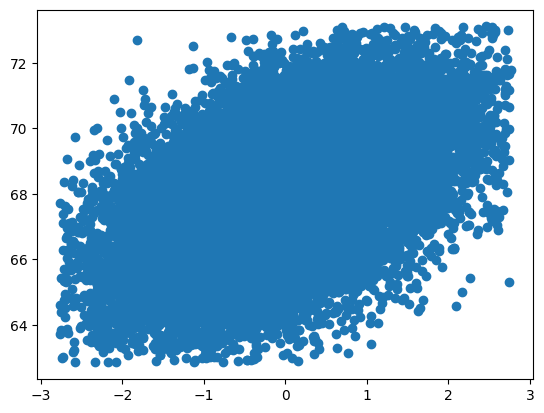

In [76]:
plt.scatter(X_train,y_train)

In [77]:
# model training
from sklearn.linear_model import LinearRegression

In [78]:
regressor = LinearRegression()

In [79]:
regressor.fit(X_train,y_train)

LinearRegression()

In [80]:
# this is theta0
regressor.intercept_

array([67.99592699])

In [81]:
# thsis is theta1
regressor.coef_

array([[0.87909434]])

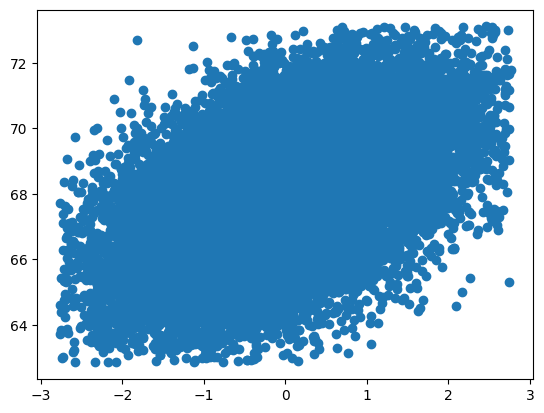

In [82]:
plt.scatter(X_train,y_train)

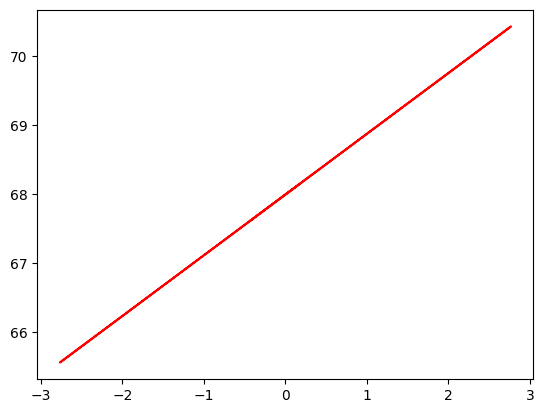

In [85]:
plt.plot(X_train,regressor.predict(X_train),'r')

In [86]:
# prediction for test data

y_pred_test = regressor.predict(X_test)

In [87]:
y_pred_test

array([[68.13595785],
       [68.98342902],
       [67.36405692],
       ...,
       [69.45211916],
       [68.62837943],
       [68.33881207]])

In [88]:
y_test

,Height
20521,69.72279
16809,69.59150
7238,68.23983
23794,66.78068
19841,66.45283
...,...
3031,71.21679
23238,69.16742
14308,69.19577
17248,68.48654


In [89]:
# performance metrics : MAE,MSE,RMSE

from sklearn.metrics import mean_squared_error,mean_absolute_error


In [90]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rsme = np.sqrt(mse)
print(mse)
print(mae)
print(rsme)

2.59348794819154
1.2905690460959827
1.6104309821260705


In [91]:
# calculate r square
from sklearn.metrics import r2_score

In [92]:
score = r2_score(y_test,y_pred_test)
score

0.24479234869225341

In [94]:
# Adjusted R Square

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)



0.24463916255608553

In [ ]:
# 24% accuracy